<a href="https://colab.research.google.com/github/aelshehawy/text-as-data-computational-text-analysis-oxford/blob/main/Code/TextasData_Session4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 4:

**Plan of the session**: 

- Revise Clutsering
- Classification
- Sentiment Analysis
- Exam


# Clustering (k-means)

 - Unsupervised learning method 
 - partition n observations (i.e., documents) into k clusters 
 - in which each observation belongs to the cluster with the nearest mean.


### What is a cluser

-  Cluster refers to a collection of data points aggregated together because of certain similarities.

### How does k-means work?

- Assigning subgroups in your data - see to which subgroup your data belings
- You assign a target number k which will refer to the number of centroid needed in the dataset
- A centroid will be the real location of the center of a cluster
- Data points is allocated to each of the clusters through reducing the in-cluster sum of squares. 

### What could be issues?

- Very coarse-grained (1 doc - 1 cluster)
- Numbers of clusters have to be assigned in advance
- Difficult to evaluate


## k-means

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X,y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)


kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

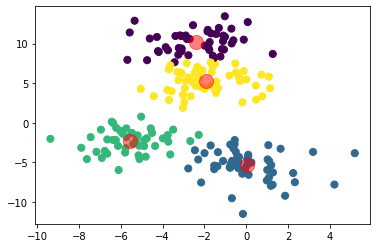

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

## let's try to cluster articles


In [ ]:
import codecs, nltk, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import nltk
nltk.download('punkt')
nltk.download('stopwords') #you can also download all libraries in nltk at once


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
exclude = set(string.punctuation) # if you see this not part of the punctuation -->”

from nltk.corpus import stopwords
exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()

# input should be a string
def text_embedding(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    
    text = nltk.word_tokenize(text)
        
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    text = [token for token in text if token not in stop_word_list]

    article_embedd = []
    
    for word in text:
            try:
                embed_word = small_model[word]
                article_embedd.append(embed_word)
            except KeyError:
                continue

    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    
    # the output is a doc-embedding
    return avg


# input should be a string
def nlp_pipeline(text):
    
    # if you want you can split in sentences - i'm usually skipping this step
    # text = nltk.sent_tokenize(text) 
    
    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
    
    # pos tagger
    text = nltk.pos_tag(text)

    # lemmatizer
    text = [wordnet_lemmatizer.lemmatize(token.lower(),"v")if "V" in pos else wordnet_lemmatizer.lemmatize(token.lower()) for token,pos in text]
    
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_word_list]
    
    text = " ".join(text)
    
    # the output is text
    return text

In [ ]:
import codecs
import gensim

small_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/small-embeddings.txt', binary=False)

# i'm re-loading everything here, because I want to use the titles of the articles to interpret the clusters
dataset = codecs.open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/rt_dataset_small", "r", "utf-8").read().strip().split("\n")

article = dataset[4].split("\t")

corpus = []
titles =  []

# you can run wit all data at home
for line in dataset[1:1000]:
    # to better understands which clusters are created, let's check the titles of the articles
    title = line.split("\t")[1]
    text = line.split("\t")[3]
    text = text_embedding(text)
    
    if len(text)>0:
        corpus.append(text)
        titles.append(title)
print ("ready!")

ready!


In [ ]:
titles

['Siberian man converts car to ‘DIY tank’ to battle snow (VIDEO)',
 'Welcome to the circus of US political conventions',
 'Massive anti-fracking rally in Barjac, France',
 "'PM of conflict': Netanyahu to blame for pushing Palestinians out of jobs, says SodaStream CEO",
 'Blocking online porn could be against EU law',
 'Over 50 Anonymous activists arrested at Million Mask March in London',
 'Islamic (Welfare) State: ‘Belgium taxpayers paid for terrorist attack’',
 "RT social media wins ‘People's Voice’ at Webbys – the ‘Oscars of the web’",
 'Trump wins Electoral College thanks to older whites, loses popular vote',
 'Russia to launch yearly manned flights to Moon starting 2025',
 'West has ‘no lesson to give to Russia about democracy’ – former MEP',
 'Cheese heists: $160,000 worth of cheese stolen in Wisconsin',
 'Argentina to suspend RT from national broadcasting',
 'Ax-wielding Afghan teen attacks German railway passengers',
 'Russia’s Svetlana Kuznetsova to face Victoria Azarenka in M

In [ ]:
from sklearn.cluster import KMeans

# usual thing, np arrays
X = np.array(corpus)
y = np.array(titles) 

# we define kmeans, with 10 clusters (you can change this number and see how the results change)
# then we train it using only the documents
kmeans = KMeans(n_clusters=10).fit(X)

In [ ]:
X

array([[ 0.26673456,  0.18386817,  0.23923797, ..., -0.03518731,
        -0.01964311, -0.00065996],
       [ 0.09993993,  0.08859506,  0.04665495, ...,  0.02271723,
        -0.07957304, -0.03936659],
       [ 0.20105366, -0.09937928,  0.05786901, ...,  0.26046394,
         0.10265331, -0.26479576],
       ...,
       [ 0.27829291, -0.13293132,  0.16193351, ...,  0.08101603,
         0.14791355, -0.4118244 ],
       [ 0.45141663, -0.23514035,  0.22523136, ...,  0.40629457,
        -0.09179959, -0.1938104 ],
       [ 0.0077315 ,  0.14166952, -0.08203293, ..., -0.06125831,
         0.12865173,  0.10749375]])

In [ ]:
y

array(['Siberian man converts car to ‘DIY tank’ to battle snow (VIDEO)',
       'Welcome to the circus of US political conventions',
       'Massive anti-fracking rally in Barjac, France',
       "'PM of conflict': Netanyahu to blame for pushing Palestinians out of jobs, says SodaStream CEO",
       'Blocking online porn could be against EU law',
       'Over 50 Anonymous activists arrested at Million Mask March in London',
       'Islamic (Welfare) State: ‘Belgium taxpayers paid for terrorist attack’',
       "RT social media wins ‘People's Voice’ at Webbys – the ‘Oscars of the web’",
       'Trump wins Electoral College thanks to older whites, loses popular vote',
       'Russia to launch yearly manned flights to Moon starting 2025',
       'West has ‘no lesson to give to Russia about democracy’ – former MEP',
       'Cheese heists: $160,000 worth of cheese stolen in Wisconsin',
       'Argentina to suspend RT from national broadcasting',
       'Ax-wielding Afghan teen attacks Germa

In [ ]:
# these are the labels we obtain
kmeans.labels_

array([9, 2, 1, 5, 0, 1, 2, 4, 2, 8, 2, 6, 2, 1, 7, 7, 7, 1, 0, 5, 8, 0,
       6, 9, 3, 2, 3, 5, 9, 0, 0, 2, 9, 1, 5, 1, 4, 7, 5, 5, 9, 4, 8, 5,
       4, 7, 5, 8, 2, 6, 8, 4, 8, 0, 2, 3, 5, 7, 9, 6, 9, 5, 4, 6, 3, 6,
       5, 4, 8, 9, 5, 6, 1, 1, 3, 9, 8, 1, 1, 0, 0, 1, 2, 6, 2, 3, 5, 8,
       5, 5, 5, 0, 1, 8, 6, 6, 6, 8, 1, 8, 5, 5, 0, 6, 6, 1, 5, 5, 2, 5,
       1, 0, 9, 2, 2, 1, 9, 3, 5, 6, 6, 9, 8, 6, 8, 5, 9, 5, 1, 2, 0, 2,
       2, 5, 1, 0, 2, 1, 2, 4, 3, 2, 8, 9, 4, 4, 2, 7, 2, 3, 4, 8, 0, 6,
       3, 9, 3, 5, 8, 8, 5, 5, 2, 2, 2, 6, 0, 2, 1, 5, 6, 6, 2, 5, 1, 1,
       4, 8, 3, 1, 5, 9, 7, 5, 7, 7, 7, 9, 5, 1, 9, 1, 7, 5, 7, 5, 3, 8,
       2, 8, 6, 6, 0, 2, 7, 5, 1, 8, 6, 7, 1, 2, 2, 1, 0, 2, 2, 5, 5, 6,
       5, 1, 3, 0, 5, 5, 5, 0, 4, 8, 1, 4, 6, 2, 7, 1, 5, 6, 0, 5, 5, 8,
       2, 2, 0, 5, 3, 8, 5, 9, 0, 9, 7, 3, 7, 5, 8, 0, 0, 9, 6, 7, 0, 4,
       6, 4, 0, 1, 2, 8, 4, 9, 5, 5, 1, 5, 2, 1, 2, 2, 1, 1, 0, 5, 6, 8,
       7, 0, 6, 6, 1, 9, 8, 0, 2, 1, 0, 2, 6, 6, 9,

In [ ]:
# to see which docs are in which clusters, we need to loop over all labels

# so the number of clusters
for i in range(10):
    # print the title of the document if the doc is in this cluster
    print ("this is cluster number",i)
    # then you loop over all titles
    for k in range(len(titles)):
        
        # this is the title
        title = titles[k]
        
        #this is its cluster label
        label = kmeans.labels_[k]
        
        # does it belong to this cluster?
        if i == label:
            #if yes, then print it out!
            print (title)
    print (" ")

this is cluster number 0
Blocking online porn could be against EU law
'Secret expansion': GCHQ may be employing 'thousands more' than it officially admits
Danish police accused of manipulating rape statistics to hide ‘hundreds’ of cases
WADA backs down in meldonium scandal, dozens of Russians could be free to compete
Senior Russian senator drafts bill allowing regional prosecutors to block extremist websites
Baltimore PD introduces new ‘use of force’ policy [VIDEO]
GTMO 2016: Special report on the future of the detainment camp
Police raid UEFA HQ as Panama Papers scandal spreads
Ex-Barclays traders jailed over Libor rigging
Goldman Sachs bans employee donations to Trump’s election campaign, but Clinton not subject to rule
James Bond wouldn’t make the grade in modern MI6, says Britain’s top spy
Virginia Senate approves use of electric chair for executions
Revenge: Activists unleash 1,000s of locusts, cockroaches on Byron burger branches for migrant sting
'Shocked & concerned': European 

In [ ]:
 #let's count which are the most popular words in the titles of each cluster
from collections import Counter
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')



for i in range(10):
    
    # we create a list where we put the words from the titles
    title_words = []
    
    print ("this is cluster number",i)
    for k in range(len(titles)):
        # we clean the title with our pipeline
        title = nlp_pipeline(titles[k]).split(" ")
        label = kmeans.labels_[k]
        if i == label:
            # we put each word in the list
            for word in title:
                title_words.append(word)
    
    # then we count and print the 10 most common
    most_common = Counter(title_words).most_common(10)
    print (most_common)
    print (" ")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
this is cluster number 0
[('russian', 8), ('police', 4), ('sentence', 4), ('arrest', 4), ('block', 3), ('eu', 3), ('may', 3), ('case', 3), ('wada', 3), ('scandal', 3)]
 
this is cluster number 1
[('video', 12), ('police', 8), ('kill', 8), ('syrian', 7), ('isi', 7), ('protest', 6), ('protester', 6), ('photo', 5), ('injure', 5), ('rally', 4)]
 
this is cluster number 2
[('clinton', 14), ('trump', 12), ('rt', 8), ('russia', 6), ('brexit', 6), ('u', 5), ('putin', 5), ('hillary', 5), ('vote', 4), ('presidential', 4)]
 
this is cluster number 3
[('since', 4), ('chinese', 4), ('russia', 4), ('oil', 4), ('first', 3), ('russian', 3), ('economy', 3), ('year', 3), ('u', 3), ('uk', 3)]
 
this is cluster number 4
[('episode', 14), ('me

### For all of my mean girls fans out there! 

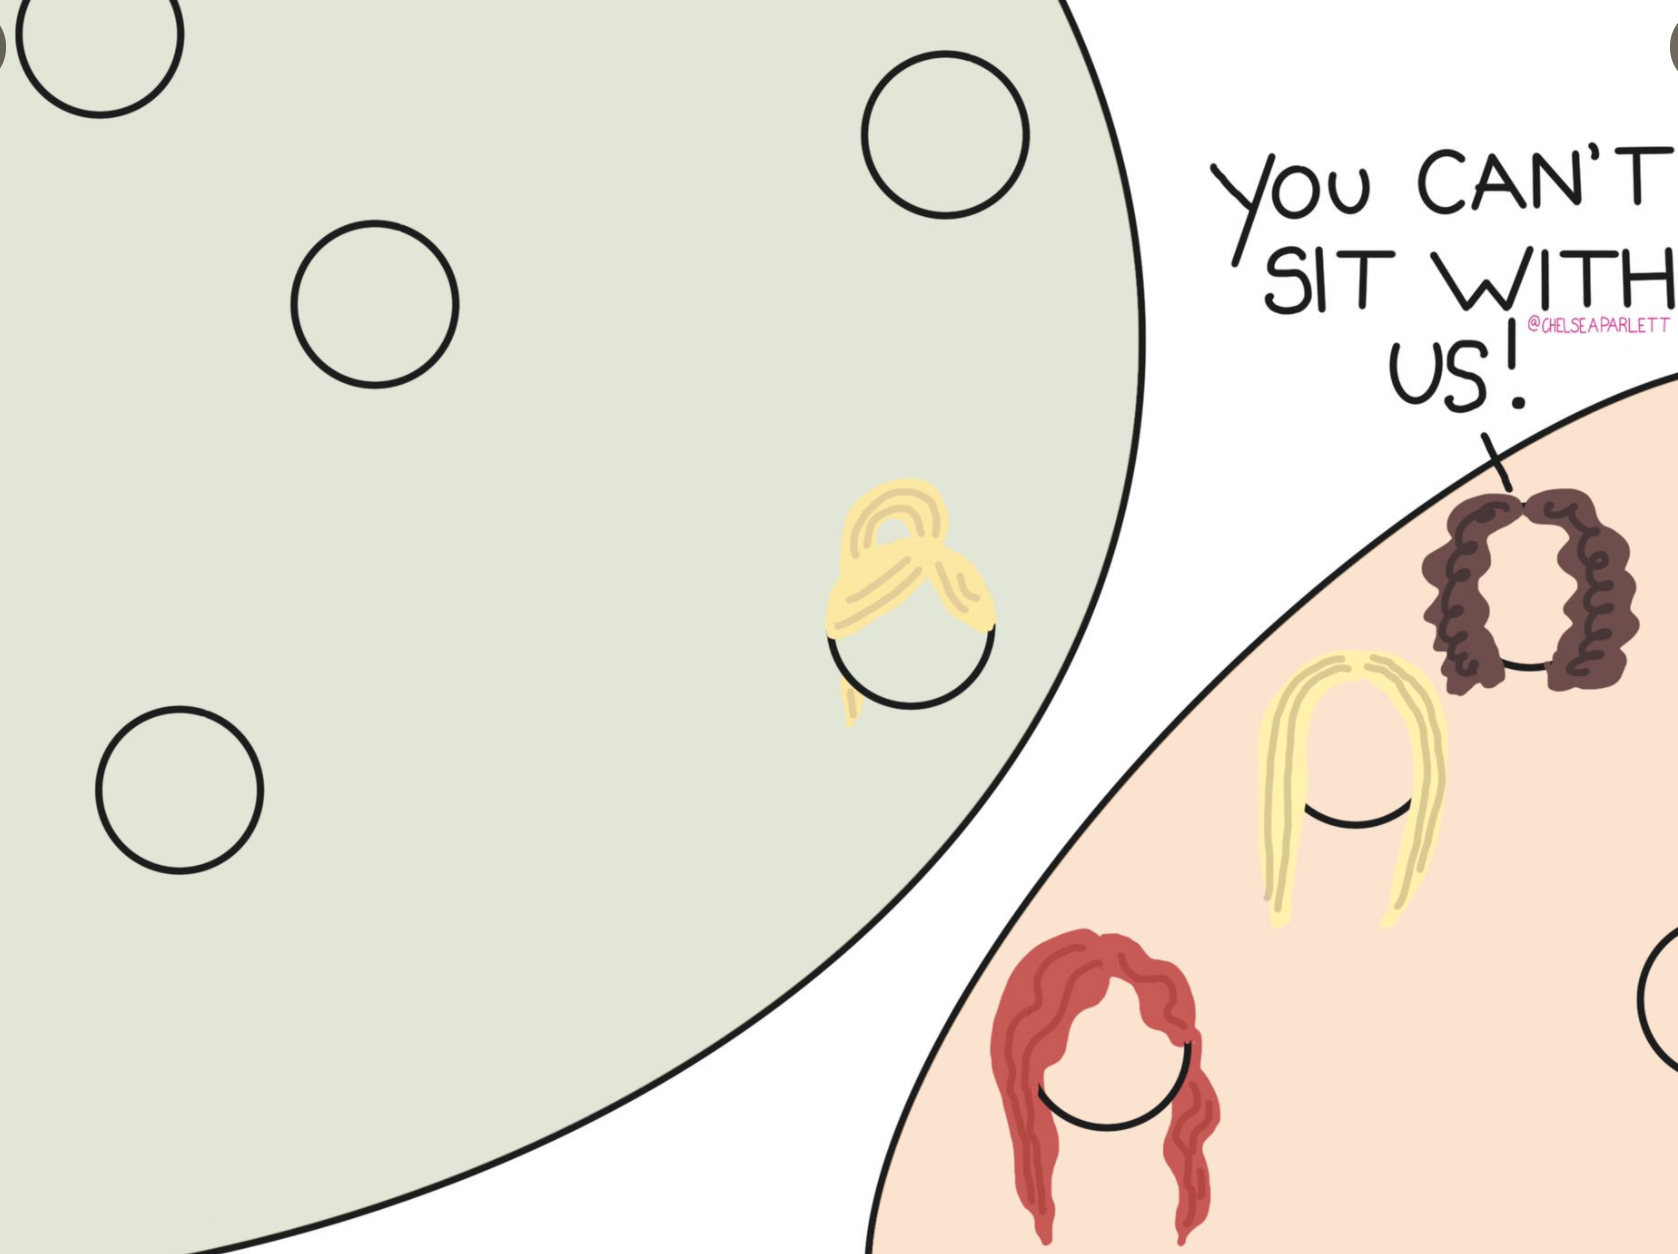

<h1 align="center"> Classification - Supervised Learning Method</h1> 


# What is Classification?

The task of associating instances (e.g., documents, sentences, words) with pre-defined labels

- Document classification
  - Relevance Classification (binary)
  - Sentiment analysis (binary / multi-class)
  - Topic Classification (multi-class)
- POS tagging
- Named Entity Recognition


## Rule based vs. Machine Learning

- Rule-based: define a list of “if - then” rules. 

  For example:<br\>
  if it mentions “bad” then negative


- Machine Learning: manually label the data and train a machine learning model on it.


### Problems with Rule Based Techniques when Classifying text
- You need many rules to cover all cases
- You need to handle many exceptions
- Defining rules is time consuming and inherently subjective


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import codecs, nltk, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import gensim
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg


In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string
def text_embedding(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    
    text = nltk.word_tokenize(text)
        
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    text = [token for token in text if token not in stop_word_list]

    article_embedd = []
    
    for word in text:
            try:
                embed_word = small_model[word]
                article_embedd.append(embed_word)
            except KeyError:
                continue

    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    
    # the output is a doc-embedding
    return avg

In [ ]:
#load our embeddings
small_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/small-embeddings.txt', binary=False)

## How does supervised machine learning work?

1. You provide the system (lots of) examples of the things you want to classify (we call it training set), in pair: instance - label
2. You train the system (.fit()): it will try to learn how to classify instances in labels in order to minimize a loss function
3. You test on a different dataset (test set), to measure performances



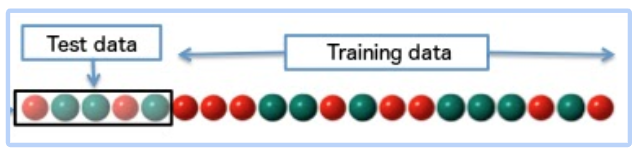

## Labeling
- Define the specific task (e.g., “Identifying the polarity of Donald Trump’s tweets”)
- Prepare guidelines for labeling consistently
- Having different (at least 3) annotators
- Compute their agreement (to know how difficult it is)

**Bad labels generate the “Garbage-in-Garbage-out” effect!**
- A (properly) labelled dataset is called gold standard (or ground-truth)

In [ ]:
dataset = codecs.open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/rt_dataset_small", "r", "utf-8").read().strip().split("\n")

article = dataset[4].split("\t")

corpus = []
labels =  []

# we load the first 5000 lines of our dataset (you can try to load it all at home)
for line in dataset[1:5000]:
    # the topic, like "usa" "uk", etc is the label that we want to predict
    label = line.split("\t")[2]
    #here we use our text
    text = line.split("\t")[3]
    # as usual, we use text-embeddings
    text = text_embedding(text)
    
    if len(text)>0:
        corpus.append(text)
        labels.append(label)
print ("ready!")

ready!


In [ ]:
corpus[1:10]
len(corpus)

525

In [ ]:
print(type(corpus))

<class 'list'>


In [ ]:
#we check labels
labels

['news',
 'op-edge',
 'in-motion',
 'news',
 'uk',
 'uk',
 'op-edge',
 'news',
 'usa',
 'news',
 'op-edge',
 'usa',
 'news',
 'news',
 'sport',
 'sport',
 'sport',
 'in-motion',
 'uk',
 'op-edge',
 'politics',
 'news',
 'sport',
 'news',
 'business',
 'usa',
 'business',
 'shows',
 'business',
 'sport',
 'politics',
 'usa',
 'usa',
 'usa',
 'news',
 'politics',
 'in-motion',
 'sport',
 'news',
 'news',
 'news',
 'shows',
 'news',
 'politics',
 'usa',
 'sport',
 'news',
 'in-motion',
 'uk',
 'uk',
 'news',
 'shows',
 'business',
 'usa',
 'usa',
 'business',
 'uk',
 'usa',
 'news',
 'usa',
 'usa',
 'op-edge',
 'usa',
 'usa',
 'business',
 'usa',
 'news',
 'usa',
 'in-motion',
 'viral',
 'shows',
 'news',
 'in-motion',
 'in-motion',
 'business',
 'viral',
 'news',
 'in-motion',
 'news',
 'usa',
 'sport',
 'usa',
 'op-edge',
 'usa',
 'op-edge',
 'business',
 'news',
 'business',
 'news',
 'news',
 'op-edge',
 'business',
 'news',
 'business',
 'viral',
 'viral',
 'usa',
 'news',
 'news',
 

In [ ]:
# again, we use np arrays as they are more efficient
X = np.array(corpus)
y = np.array(labels) 

In [ ]:
X

array([[ 0.26673456,  0.18386817,  0.23923797, ..., -0.03518731,
        -0.01964311, -0.00065996],
       [ 0.09993993,  0.08859506,  0.04665495, ...,  0.02271723,
        -0.07957304, -0.03936659],
       [ 0.20105366, -0.09937928,  0.05786901, ...,  0.26046394,
         0.10265331, -0.26479576],
       ...,
       [ 0.27829291, -0.13293132,  0.16193351, ...,  0.08101603,
         0.14791355, -0.4118244 ],
       [ 0.45141663, -0.23514035,  0.22523136, ...,  0.40629457,
        -0.09179959, -0.1938104 ],
       [ 0.0077315 ,  0.14166952, -0.08203293, ..., -0.06125831,
         0.12865173,  0.10749375]])

In [ ]:
X.shape

(525, 50)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11) #random state to produce same results for different runs

In [ ]:
X_train.shape
X_test.shape
y_test

array(['usa', 'uk', 'op-edge', 'uk', 'sport', 'usa', 'news', 'usa', 'uk',
       'op-edge', 'politics', 'in-motion', 'in-motion', 'shows', 'viral',
       'uk', 'news', 'shows', 'in-motion', 'news', 'usa', 'in-motion',
       'viral', 'shows', 'news', 'uk', 'business', 'uk', 'sport', 'shows',
       'usa', 'sport', 'in-motion', 'op-edge', 'in-motion', 'news',
       'news', 'news', 'news', 'usa', 'uk', 'op-edge', 'news', 'usa',
       'usa', 'usa', 'news', 'news', 'uk', 'uk', 'uk', 'uk', 'news',
       'in-motion', 'in-motion', 'news', 'news', 'usa', 'sport', 'news',
       'news', 'op-edge', 'usa', 'usa', 'news', 'news', 'news', 'op-edge',
       'news', 'op-edge', 'sport', 'news', 'in-motion', 'uk', 'news',
       'uk', 'in-motion', 'in-motion', 'usa', 'in-motion', 'usa', 'shows',
       'news', 'uk', 'in-motion', 'politics', 'uk', 'business', 'usa',
       'news', 'news', 'news', 'news', 'usa', 'politics', 'news', 'news',
       'usa', 'in-motion', 'op-edge', 'usa', 'op-edge', 'spor

In [ ]:
X_train

array([[ 0.18260237, -0.00205659,  0.25166737, ...,  0.19600899,
         0.07005041,  0.08341198],
       [ 0.1846605 , -0.00969482,  0.05872509, ...,  0.38743767,
         0.01121047,  0.2356798 ],
       [ 0.26581369,  0.0119582 , -0.0544763 , ...,  0.64883608,
         0.06680952, -0.08287304],
       ...,
       [ 0.528457  ,  0.01539032,  0.34413025, ...,  0.05480164,
         0.05535871, -0.02622813],
       [ 0.08653419,  0.07275359,  0.11509864, ...,  0.19588794,
         0.09170769,  0.05958684],
       [ 0.17895036,  0.00866964, -0.06959845, ...,  0.41402004,
         0.11538235, -0.20523502]])

## Logistic Regression

- multi-class: one vs.all - OneVsOneClassifier constructs one classifier per pair of classes. 
- At prediction time, the class which received the most votes is selected.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg_log = LogisticRegression(multi_class="ovr")
reg_log.fit(X_train, y_train)
y_pred_log = reg_log.predict(X_test)

In [ ]:
y_pred_log

array(['usa', 'uk', 'op-edge', 'uk', 'news', 'usa', 'news', 'usa', 'news',
       'news', 'news', 'in-motion', 'in-motion', 'shows', 'viral', 'news',
       'op-edge', 'usa', 'news', 'news', 'viral', 'in-motion', 'viral',
       'news', 'news', 'uk', 'business', 'news', 'sport', 'shows', 'usa',
       'sport', 'in-motion', 'op-edge', 'news', 'news', 'news', 'news',
       'news', 'usa', 'uk', 'op-edge', 'news', 'viral', 'usa', 'usa',
       'news', 'news', 'uk', 'uk', 'news', 'usa', 'news', 'in-motion',
       'in-motion', 'viral', 'news', 'usa', 'sport', 'news', 'news',
       'op-edge', 'usa', 'usa', 'viral', 'business', 'news', 'news',
       'news', 'news', 'sport', 'op-edge', 'in-motion', 'news', 'op-edge',
       'uk', 'in-motion', 'in-motion', 'usa', 'news', 'news', 'shows',
       'news', 'uk', 'viral', 'news', 'news', 'business', 'news',
       'op-edge', 'news', 'news', 'news', 'usa', 'news', 'news', 'news',
       'usa', 'in-motion', 'op-edge', 'usa', 'news', 'uk', 'in-motio

## Naive Bayes Classifier

- A probabilistic generative model: outputs are class/label probabilities.
- Conditional independence of features with respect to labels
- Then, pick the label that is most probable.
- Simple, but Used as baseline
- No feature-dependence (“new” and “york” are independent tokens)


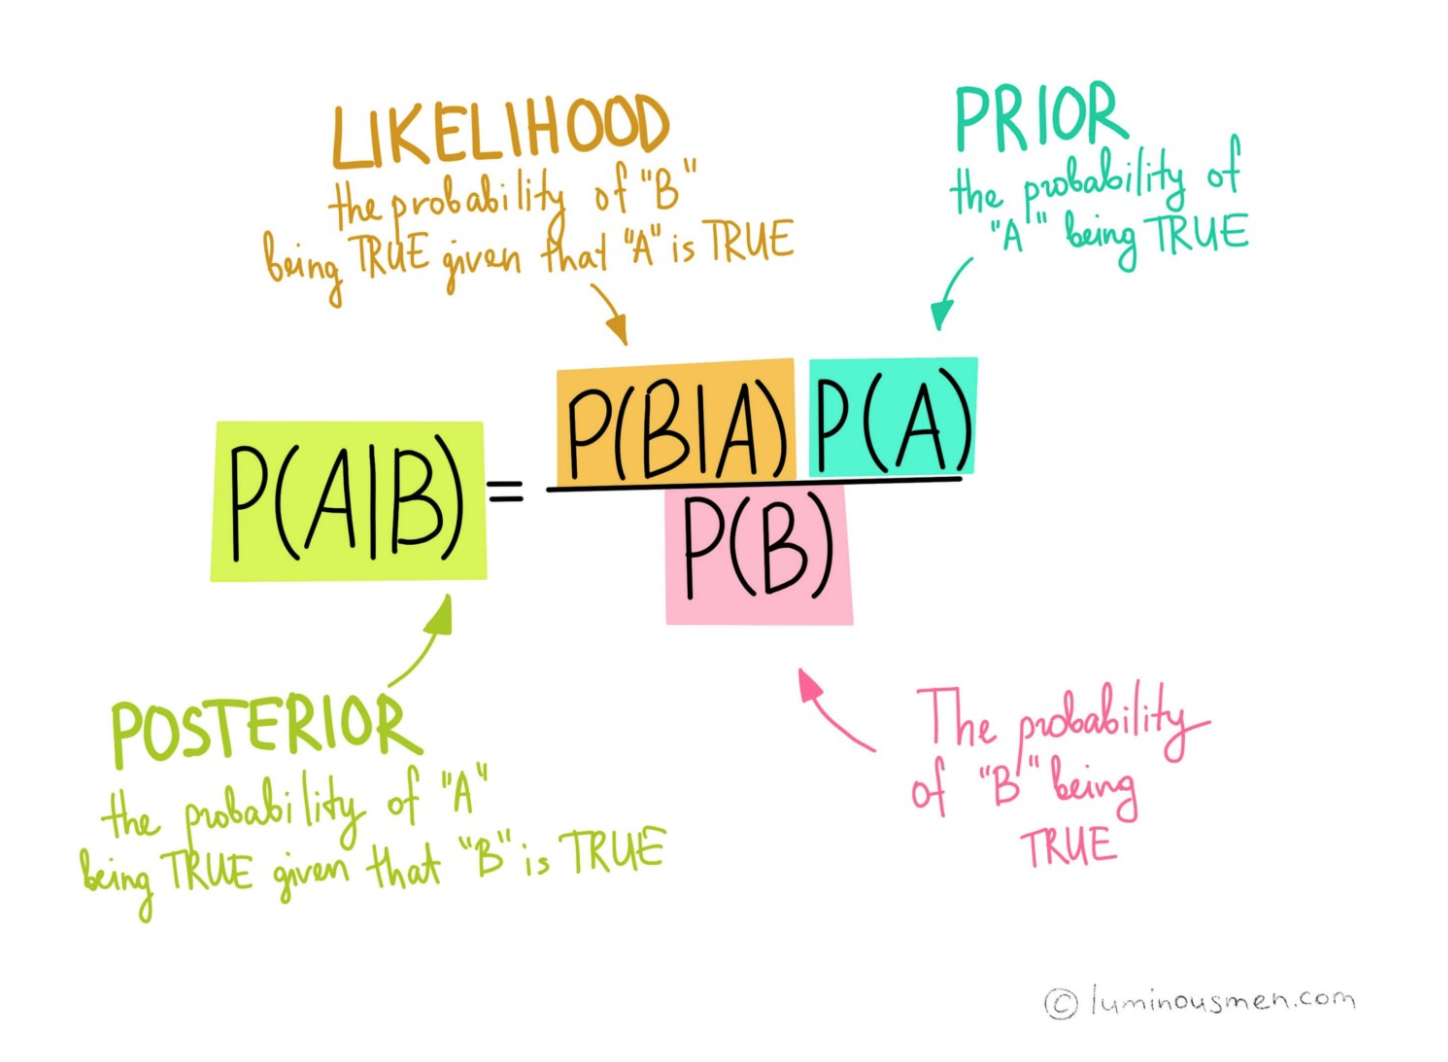

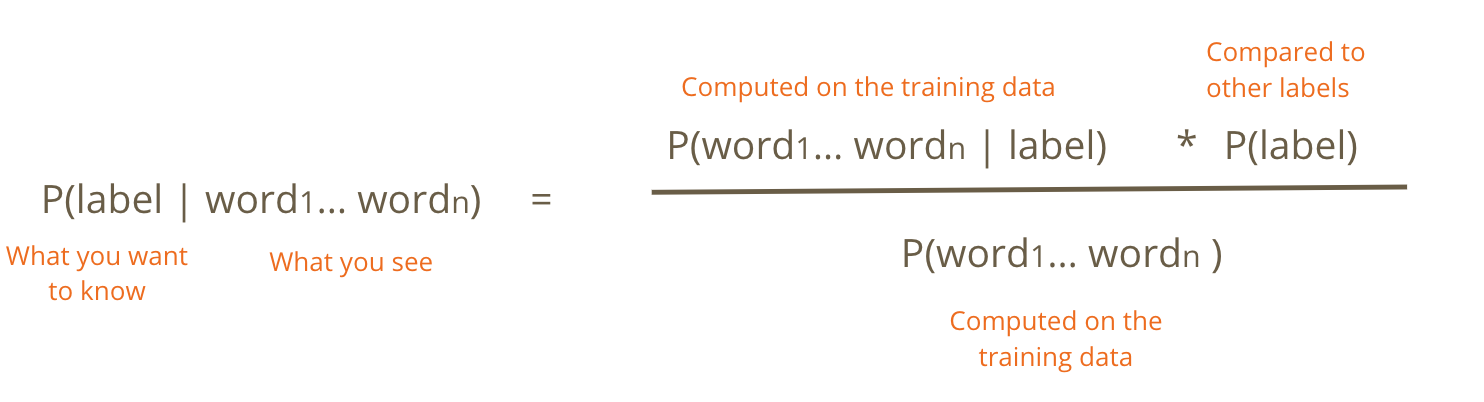

In [ ]:
from sklearn.naive_bayes import GaussianNB

reg_nb = GaussianNB() 
reg_nb.fit(X_train, y_train)
y_pred_nb = reg_nb.predict(X_test)

In [ ]:
X_train.shape

(420, 50)

## Support Vector Machine

1. Non-probabilistic discriminative model. 
2. Project instances in space.
3. Find hyperplane that maximizes margin between closest opposite examples.

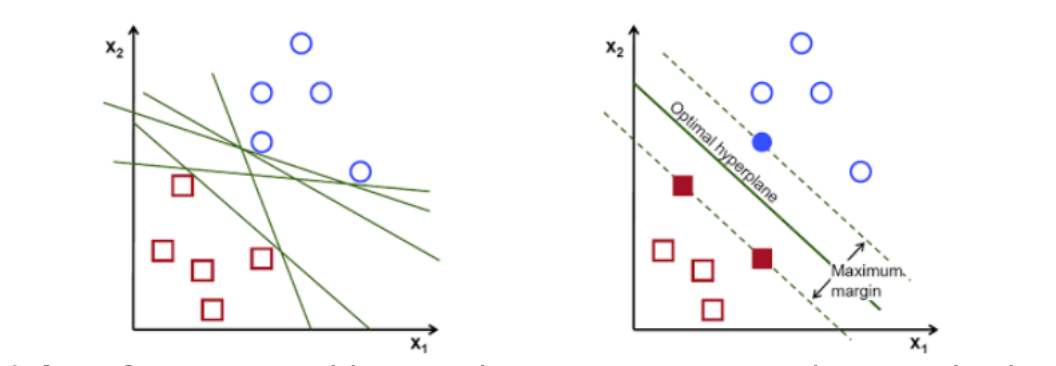

In [ ]:
from sklearn.svm import SVC

reg_svc = SVC()
reg_svc.fit(X_train, y_train)
y_pred_svm = reg_svc.predict(X_test)



## KNeighborsClassifier

k-NN models work by taking a data point and looking at the ‘k’ closest labeled data points. The data point is then assigned the label of the majority of the ‘k’ closest points


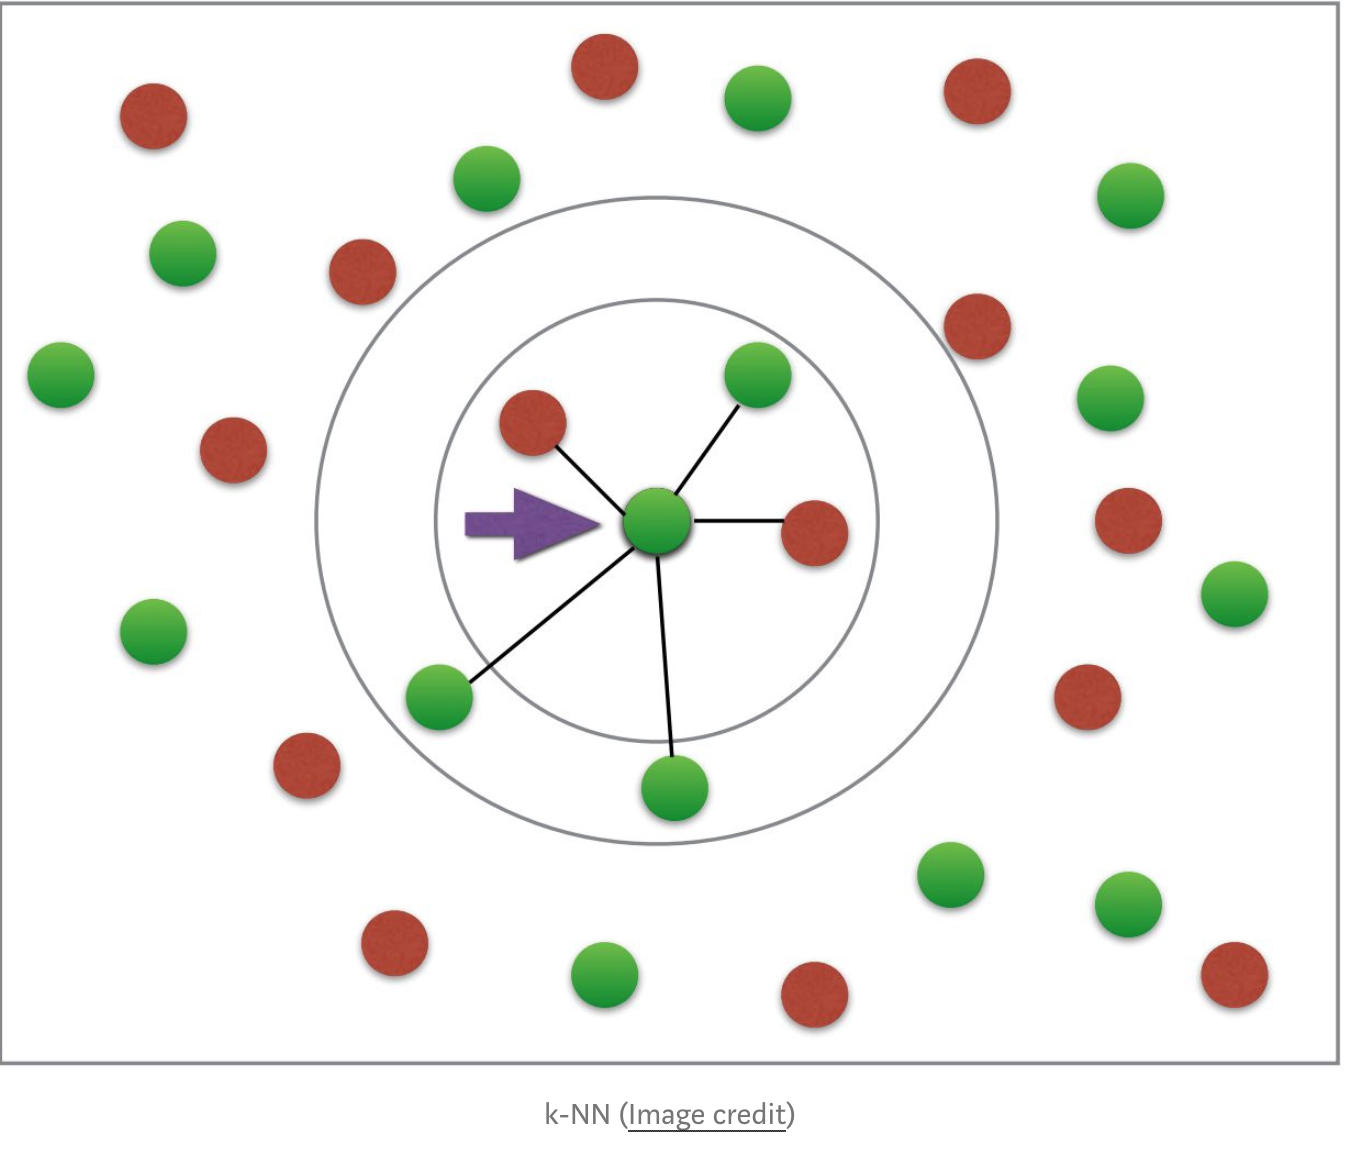

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
reg_knn = KNeighborsClassifier(n_neighbors = 5)
reg_knn.fit(X_train, y_train)
y_pred_kc = reg_knn.predict(X_test)


# Evaluation

**Measures:**
- Precision: number of selected items that are relevant
- Recall: number of relevant items that are selected
- F-1 Score: the harmonic mean of precision and recall


| Gold Standard        | Positive   170        | Negative 30 |
| -------------------- |:-------------:| -----:|
| System Output      | 195 tweets negative (169 corrects) | 5 positive (4 corrects)|

**Example**

- Precision:  fraction of relevant/correctly specified instances among the retrieved instances<br\>
Negative: 87%, Positive: 80% - for negative **(169/195)**

- Recall: number of relevant/correctly specified items that are selected from all instances<br\>
Negative: 99%, Positive: 13% - for negative **169/170**

- F-1 Score: the harmonic mean of precision and recall<br\>
Negative: 93%, Positive: 22%


\begin{equation*}
F1=2*((Percision*Recall)/(Precision+Recall))
\end{equation*}

Calculation for negative values in that example of the F1 score:
\begin{equation*}
F1=2*((99*87)/(99+87) )
\end{equation*}


Note:
    
- A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally)
- A micro-average will aggregate the contributions of all classes to compute the average metric.

In [ ]:
from sklearn import metrics
print("Logistic Regression")
print(metrics.classification_report(y_test, y_pred_log))
print("SVM")
print(metrics.classification_report(y_test, y_pred_svm))
print("Naive Bayes")
print(metrics.classification_report(y_test, y_pred_nb))
print("K-Nearest Neighbor")
print(metrics.classification_report(y_test, y_pred_kc))


Logistic Regression
              precision    recall  f1-score   support

    business       0.67      1.00      0.80         2
   in-motion       0.91      0.71      0.80        14
        news       0.53      0.74      0.62        31
     op-edge       0.56      0.56      0.56         9
    politics       0.00      0.00      0.00         3
       shows       1.00      0.60      0.75         5
       sport       1.00      0.67      0.80         6
          uk       0.89      0.53      0.67        15
         usa       0.88      0.78      0.82        18
       viral       0.29      1.00      0.44         2

    accuracy                           0.68       105
   macro avg       0.67      0.66      0.63       105
weighted avg       0.73      0.68      0.68       105

SVM
              precision    recall  f1-score   support

    business       0.67      1.00      0.80         2
   in-motion       1.00      0.36      0.53        14
        news       0.48      0.81      0.60        31


## Confusion-Matrix

- y-axis true label
- x-axis predicted label

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
unique_label = np.unique([y_test, y_pred_nb])
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_pred_nb, labels=unique_label), 
    index=['true:{:}'.format(x) for x in unique_label], 
    columns=['pred:{:}'.format(x) for x in unique_label]
)
print(cmtx)

                pred:business  pred:in-motion  ...  pred:usa  pred:viral
true:business               2               0  ...         0           0
true:in-motion              0              14  ...         0           0
true:news                   2               1  ...         1           3
true:op-edge                0               0  ...         0           0
true:politics               0               0  ...         0           0
true:shows                  0               0  ...         0           0
true:sport                  0               0  ...         1           0
true:uk                     1               0  ...         2           0
true:usa                    0               0  ...        10           2
true:viral                  0               0  ...         0           2

[10 rows x 10 columns]


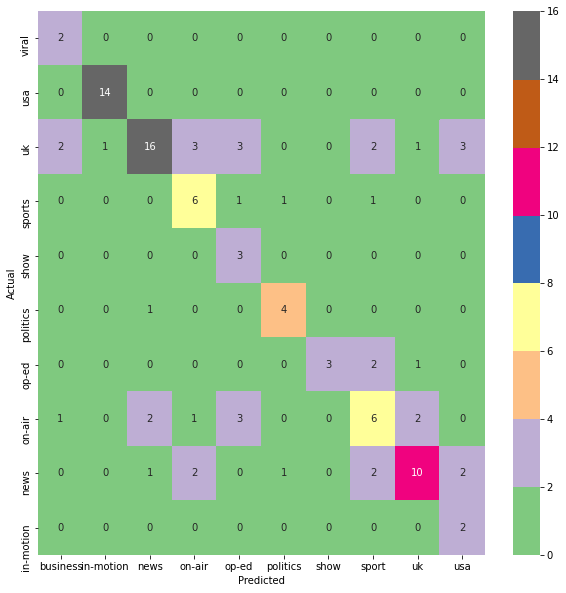

In [ ]:
unique_label = np.unique([y_test, y_pred_nb])


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_nb, labels=unique_label)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap="Accent")
plt.ylabel('Actual')
plt.xlabel('Predicted')
ax.xaxis.set_ticklabels(['business', 'in-motion',"news","on-air","op-ed","politics","show","sport","uk","usa","viral"])\
; ax.yaxis.set_ticklabels(['viral',"usa","uk","sports","show","politics","op-ed","on-air","news",'in-motion','buisness']);
plt.show()

In [ ]:
unique_label

array(['business', 'in-motion', 'news', 'op-edge', 'politics', 'shows',
       'sport', 'uk', 'usa', 'viral'], dtype='<U9')

In [ ]:
conf_mat

array([[ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1, 16,  3,  3,  0,  0,  2,  1,  3],
       [ 0,  0,  0,  6,  1,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  2,  1,  0],
       [ 1,  0,  2,  1,  3,  0,  0,  6,  2,  0],
       [ 0,  0,  1,  2,  0,  1,  0,  2, 10,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2]])

**Cross Validation: K-fold Cross-Validation**

Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models

- The data is divided into k folds. 
- The model is trained on k-1 folds with one fold held back for testing. 
- This process gets repeated to ensure each fold of the dataset gets the chance to be the held back set. 
- Once the process is completed, we can summarize the evaluation metric using the mean or/and the standard deviation.

**Does model generalize well with unseen data?** - OVERFITTING

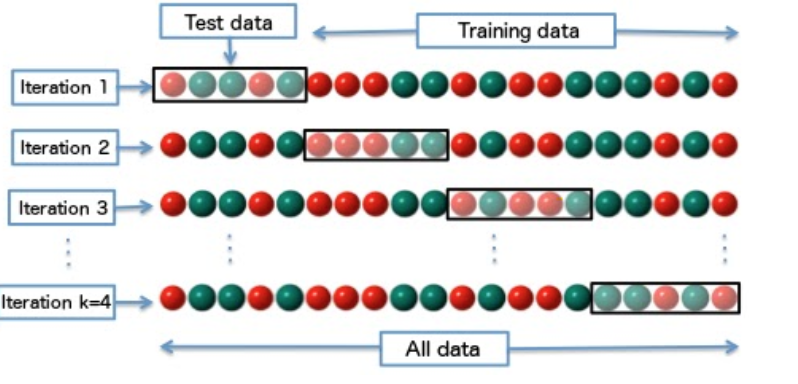

**Accuracy** is the fraction of predictions our model got right. (Number of correct predictions/Number of otal predictions)

In [ ]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=100) # we have 10 folds
model_kfold = LogisticRegression() # we initiate the model, generate cross-validation score
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold) #predictor and response arrays - 10 folds
print("Accuracy Logistic Regression: %.2f%%" % (results_kfold.mean()*100.0))


from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=100) # we have 10 folds
model_kfold = GaussianNB() # we initiate the model, generate cross-validation score
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold) 
print("Accuracy Naive Bayes: %.2f%%" % (results_kfold.mean()*100.0))


from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=100) # we have 10 folds
model_kfold = SVC() # we initiate the model, generate cross-validation score
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold) 
print("Accuracy SVM: %.2f%%" % (results_kfold.mean()*100.0))


kfold = model_selection.KFold(n_splits=10, random_state=100) # we have 10 folds
model_kfold = KNeighborsClassifier() # we initiate the model, generate cross-validation score
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold) 
print("Accuracy K-Nearest Neighbor: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy Logistic Regression: 70.44%
Accuracy Naive Bayes: 64.37%
Accuracy SVM: 59.76%
Accuracy K-Nearest Neighbor: 59.95%


## Problems with Machine Learning
- Labeling is extremely time consuming and tedious
- Trained models are difficult to interpret
- Some algorithms work better on certain tasks (no free lunch theorem)


<h1 align="center"> Sentiment Analysis </h1> 


In [ ]:
#general pipeline + embedd



import codecs, nltk, string
from nltk.corpus import stopwords

exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string, you convert text in a doc-embedding
def text_embedding(text):
    
    #it depends if the words are lowercased or not in the word embeddings that you use, if they are not skip this step
    text = text.lower()
    
    text = nltk.word_tokenize(text)
  
    # remove numbers
    text = [token for token in text if token not in exclude and token.isalpha()]

    # remove stopwords (not essential)
    text = [token for token in text if token not in stop_word_list]

    article_embedd = []
    
    # you take all embeddings
    for word in text:
            try:
                embed_word = small_model[word]
                article_embedd.append(embed_word)
            except KeyError:
                continue
    
    # then you average them
    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    
    return avg

In [ ]:
#if we want to take a look using pandas - just for visualization
import pandas as pd
sentiment = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/yelp-test.tsv", sep="\t",header=None)
sentiment=sentiment[1:]
sentiment.head()

0                                                  1
1  2  Contrary to other reviews, I have zero complai...
2  1  Last summer I had an appointment to get new ti...
3  2  Friendly staff, same starbucks fair you get an...
4  1  The food is good. Unfortunately the service is...
5  2  Even when we didn't have a car Filene's Baseme...

In [ ]:
#sentiment.to_csv('/Users/Ashrakat/Downloads/yelp-test.tsv', index= False,sep="\t")

In [ ]:
# open YELP product reviews dataset
# we are using only the "small" test-set, you can also train on the large training set if you'd like
import codecs

sentiment_dataset = codecs.open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/yelp-test.tsv","r","utf-8").read().strip().split("\n")

print (sentiment_dataset[0])
print (" ")
print (sentiment_dataset[1])

0	1
 
2	Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \nAnd they just renovated the waiting room. It looks a lot better than it did in previous years.


In [ ]:
# first, we define two folders, "corpus" - with the text and "labels", with the labels

corpus = []
labels = []

# be careful with this, the dataset is huge!
#for line in sentiment_dataset:
for line in sentiment_dataset[1:1000]:
    #its a tab seperated file
    text = line.split("\t")[1].replace('"','')# remove the  - replace with nothing
    label = line.split("\t")[0].replace('"','').replace("1","-1").replace("2","1") #change values
    
    corpus.append(text)
    labels.append(label)

In [ ]:
corpus

["Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \\nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \\nAnd they just renovated the waiting room. It looks a lot better than it did in previous years.",
 "Last summer I had an appointment to get new tires and had to wait a super long time. I also went in this week for them to fix a minor problem with a tire they put on. They \\fixed\\ it for free, and the very next morning I had the same issue. I called to complain, and the \\manager\\ didn't even apologize!!! 

In [ ]:
labels

['1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '1',

# Sentiment Analysis using Word list based approaches

"One of the simplest sentiment analysis approaches:
- compares the words of a text against a labeled word list
- where each word has been scored for valence, — **a “sentiment lexicon”** "

Check Paper by Finn ˚Arup Nielsen: http://www2.imm.dtu.dk/pubdb/edoc/imm6006.pdf

In [ ]:
# AFINN Dictionary for Sentiment Analysis: https://github.com/fnielsen/afinn
#https://github.com/fnielsen/afinn/blob/master/afinn/data/AFINN-111.txt

!pip install afinn

from afinn import Afinn

afinn = Afinn()

print (afinn.score("This is bad fake news"))

print (afinn.score("The sun is shining, what a beautiful day"))

print (afinn.score("That movie is horrible and beautiful at the same time"))

     |████████████████████████████████| 61kB 2.5MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp37-none-any.whl size=53451 sha256=61c6448338da385753c989d990a1347aa2a0fc0e75d7822ba1920cb4acccea1f
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn
-6.0
3.0
0.0


In [ ]:
pred = []

#for sentence in the corpus predict its scores
for review in corpus:
    score = afinn.score(review)
    
    #I only want two labels for each of my sentences
    #if the score is below 0 give me a value -1, and if over 0 give me the value +1
    if score < 0.0:
        pred.append("-1")
    else:
        pred.append("1")

In [ ]:
pred

['1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '-1',
 '1',
 '-1',
 '-1',
 '1',
 '-1',
 '-1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '-1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
print (precision_recall_fscore_support(labels, pred, average="macro"))#comparision with true labels


(0.7589475384175808, 0.6672953602414183, 0.6273851376847133, None)


What could we do here to improve performance?

You can find dictionaries of positive and negative words online for different languages.

Example for German: https://www.kaggle.com/rtatman/german-sentiment-analysis-toolkit
bold text

# Sentiment Analysis as a Classification Problem



In [ ]:
import codecs

sentiment_dataset = codecs.open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/yelp-test.tsv","r","utf-8").read().strip().split("\n")

print (sentiment_dataset[0])
print (" ")
print (sentiment_dataset[1])

0	1
 
2	Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \nAnd they just renovated the waiting room. It looks a lot better than it did in previous years.


In [ ]:
corpus = []
labels = []

# be careful with this, the dataset is huge!
#for line in sentiment_dataset:
for line in sentiment_dataset[1:1000]:
    
    #its a tab seperated file
    text = line.split("\t")[1].replace('"','')# remove the  - replace with nothing
    label = line.split("\t")[0].replace('"','').replace("1","-1").replace("2","1") #change values
    
    # as usual, we use text-embeddings
    text = text_embedding(text)
    
    if len(text)>0:
        corpus.append(text)
        labels.append(label)
print ("ready!")


ready!


In [ ]:
import numpy as np

X = np.array(corpus)
y = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred_log_g = reg_log.predict(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB

reg_nb = GaussianNB() 
reg_nb.fit(X_train, y_train)
y_pred_nb_g = reg_nb.predict(X_test)

In [ ]:
from sklearn.svm import SVC

reg_svc = SVC()
reg_svc.fit(X_train, y_train)
y_pred_svm_g = reg_svc.predict(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
reg_knn = KNeighborsClassifier(n_neighbors = 5)
reg_knn.fit(X_train, y_train)
y_pred_kc_g = reg_knn.predict(X_test)

In [ ]:
from sklearn import metrics
print("Logistic Regression")
print(metrics.classification_report(y_test, y_pred_log_g))
print("SVM")
print(metrics.classification_report(y_test, y_pred_svm_g))
print("Naive Bayes")
print(metrics.classification_report(y_test, y_pred_nb_g))
print("K-Nearest Neighbor")
print(metrics.classification_report(y_test, y_pred_kc_g))


Logistic Regression
              precision    recall  f1-score   support

          -1       0.80      0.80      0.80       117
           1       0.72      0.71      0.72        83

    accuracy                           0.77       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.77      0.76       200

SVM
              precision    recall  f1-score   support

          -1       0.81      0.79      0.80       117
           1       0.72      0.73      0.73        83

    accuracy                           0.77       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.77      0.77      0.77       200

Naive Bayes
              precision    recall  f1-score   support

          -1       0.77      0.75      0.76       117
           1       0.66      0.69      0.67        83

    accuracy                           0.73       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.73      0.72     

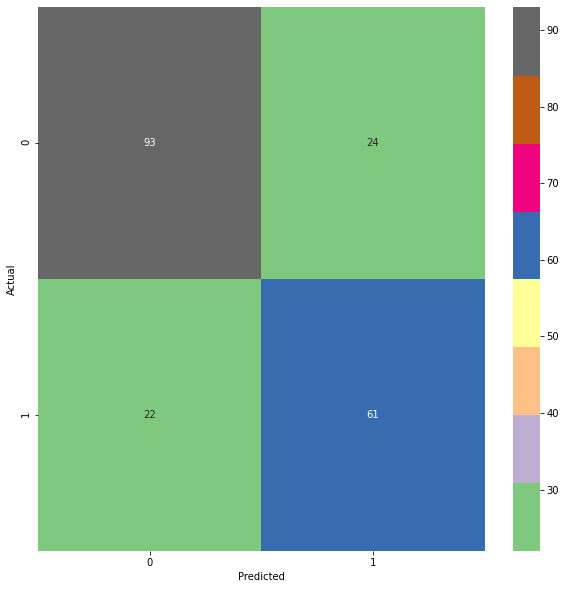

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_svm_g, )
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap="Accent")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**IDEA: KEEP only nouns and try to see if it imporves the sentiment analysis**